# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [121]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [19]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

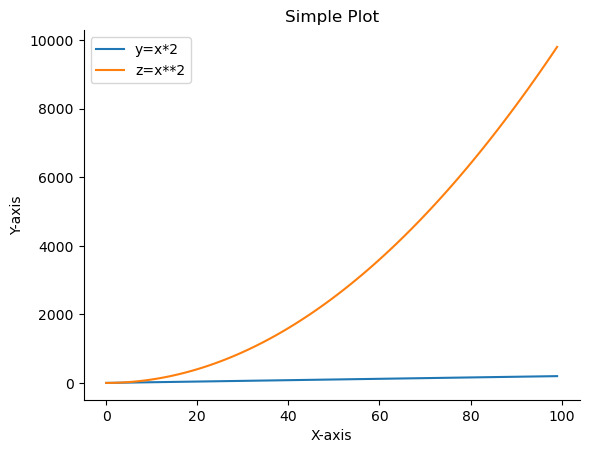

In [33]:
plt.plot(x, y, label='y=x*2')
plt.plot(x, z, label='z=x**2')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot')
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

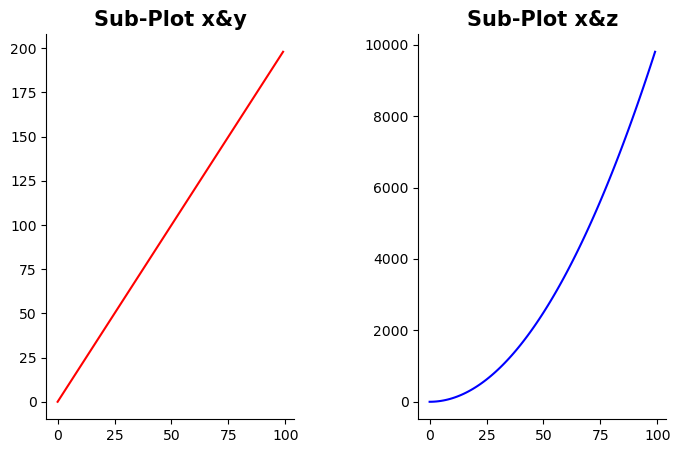

In [69]:
x = np.arange(0,100)
y = x*2
z = x**2

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(8,5))
ax1.plot(x, y, color = 'r')
ax2.plot(x,z, color = 'b')

ax1.set_title('Sub-Plot x&y', fontweight='bold', fontsize=15)
ax2.set_title('Sub-Plot x&z', fontweight='bold', fontsize=15)

plt.subplots_adjust(wspace=0.5)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.show()


#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

In [ ]:
# your code here

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

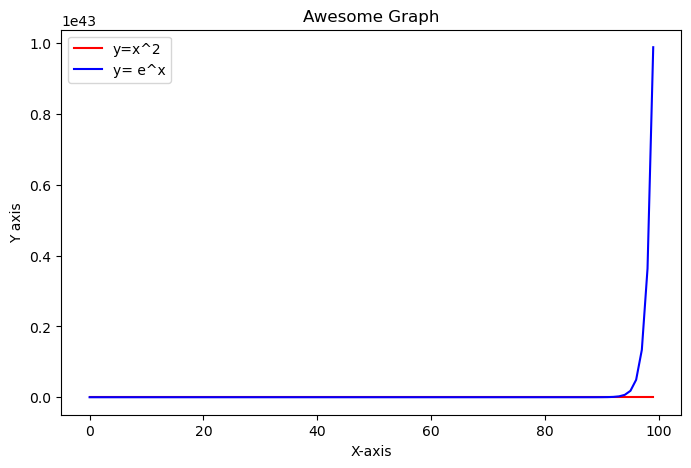

In [75]:
x = np.arange(0,100)
y1 = x**2
y2 = np.exp(x)

plt.figure(figsize=(8,5))

plt.plot(x,y1, label='y=x^2', color='r')
plt.plot(x,y2, label='y= e^x', color = 'b')

plt.legend()
plt.title('Awesome Graph')
plt.xlabel('X-axis')
plt.ylabel('Y axis')
plt.show()



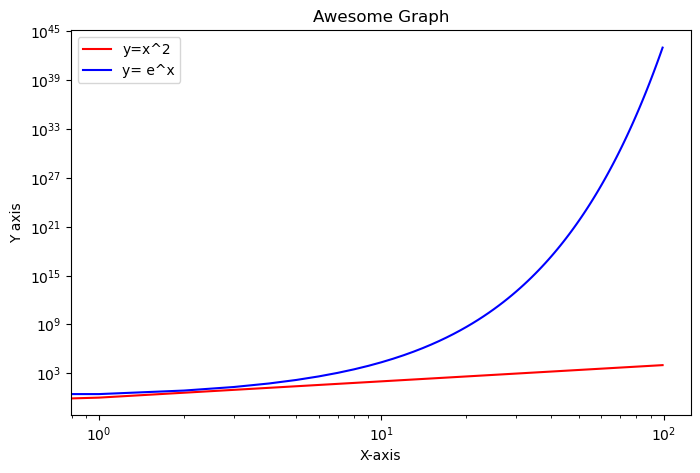

In [76]:
x = np.arange(0,100)
y1 = x**2
y2 = np.exp(x)

plt.figure(figsize=(8,5))

plt.plot(x,y1, label='y=x^2', color='r')
plt.plot(x,y2, label='y= e^x', color = 'b')

plt.legend()
plt.title('Awesome Graph')
plt.xlabel('X-axis')
plt.ylabel('Y axis')

plt.xscale('log')
plt.yscale('log')

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [83]:
import pandas as pd

fitbit = pd.read_csv("Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

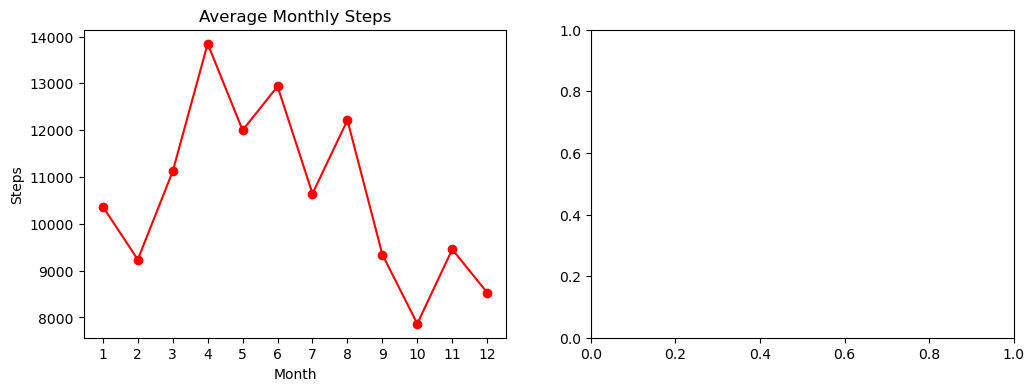

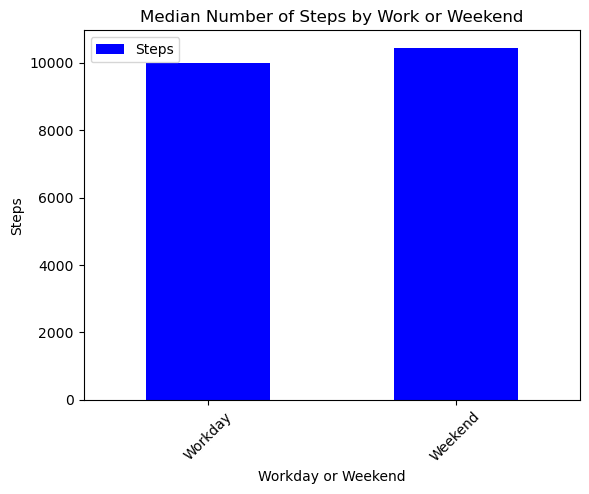

In [98]:
import os

# MEDIAN STEPS BY MONTH_ENCODED
monthly_steps = fitbit.groupby(['Months_encoded']).agg({'Steps':'median'})

# MEDIAN STEPS BY WORK_OR_WEEKEND
ww_steps = fitbit.groupby(['Work_or_Weekend']).agg({'Steps':'median'})

# your code here

fig, axes = plt.subplots(1,2, figsize=(12,4))

plt.sca(axes[0])
plt.plot(monthly_steps, 'o-', color='r')
plt.xlabel('Month')
plt.ylabel('Steps')
plt.title('Average Monthly Steps')
plt.xticks(range(1,13))

plt.sca(axes[1])
ww_steps.plot(kind='bar', color ='blue')
plt.xlabel("Workday or Weekend")
plt.ylabel("Steps")
plt.title("Median Number of Steps by Work or Weekend")
plt.xticks([0,1], ["Workday", "Weekend"], rotation = 45)

#  I cant change the code for ww_steps appear on the second plot and not a third one

if not os.path.exists('figures'):
    os.makedirs('figures')

fig.savefig('figures/plot.png')


plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

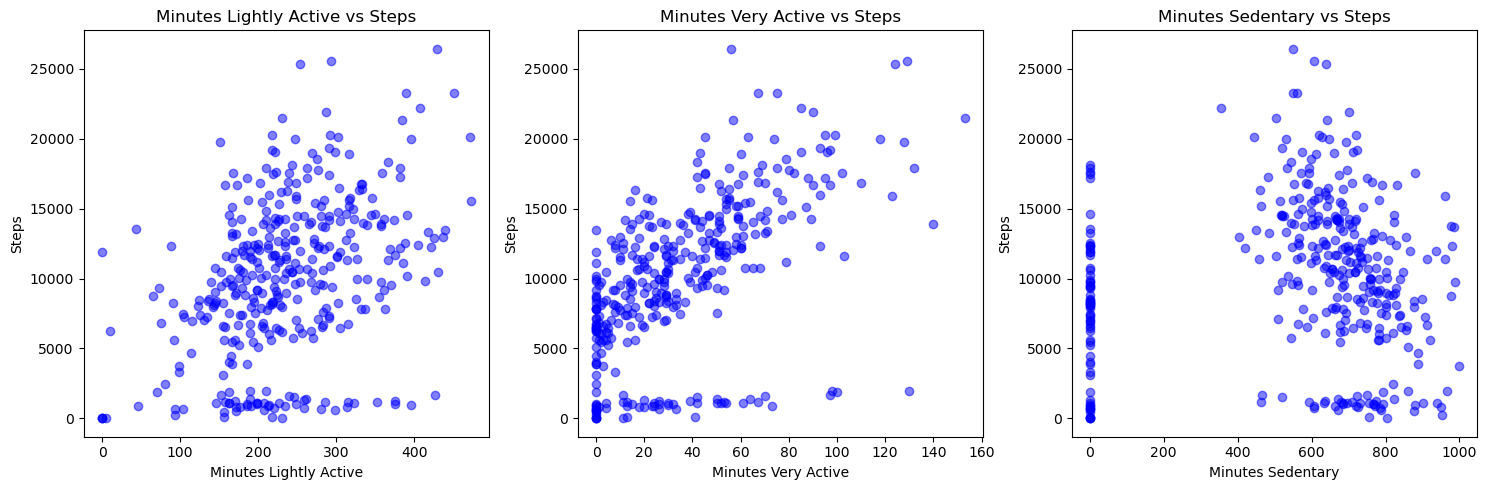

In [103]:
columns = [fitbit['Minutes Lightly Active'], fitbit['Minutes Very Active'], fitbit['Minutes Sedentary']]

fig, axes = plt.subplots(1,3, figsize=(15,5))

for indx, (name, data) in enumerate(zip(['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary'], columns)):
    plt.sca(axes[indx])
    plt.scatter(data, fitbit['Steps'], color = 'b', alpha=0.5)
    plt.xlabel(name)
    plt.ylabel("Steps")
    plt.title(f"{name} vs Steps")

plt.tight_layout()
plt.show()


## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [104]:
titanic = pd.read_csv("titanic.csv")
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [106]:
# your code here

titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [107]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include=np.number)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [108]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include=object)


,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [111]:
plt.style.use("classic")
plt.figure(figsize = (12, 6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

Text(0.5, 1.0, 'Age Distribution')

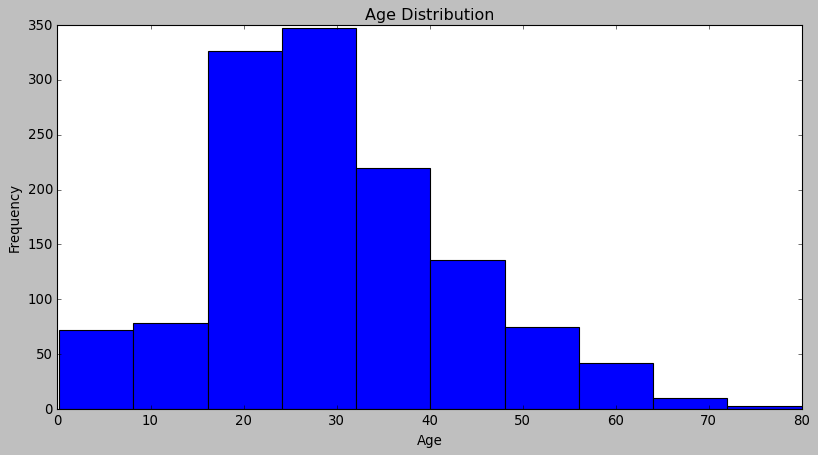

In [113]:
# your code here

plt.figure(figsize=(12,6))
plt.hist(titanic["Age"], bins = 10)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

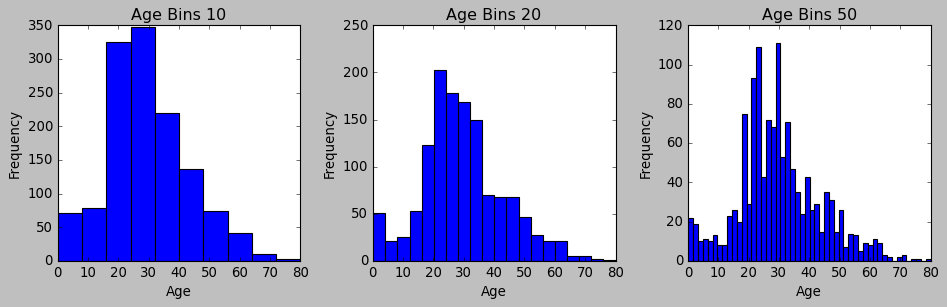

In [116]:
fig, axes = plt.subplots(1,3, figsize=(12,4))

plt.sca(axes[0])
plt.hist(titanic["Age"], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Bins 10')

plt.sca(axes[1])
plt.hist(titanic["Age"], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Bins 20')

plt.sca(axes[2])
plt.hist(titanic["Age"], bins=50)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Bins 50')

plt.tight_layout()
plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
The bin size creates more age bins increasing the spread of the blot and showing where there are more univen age frequencies. 
"""


#### Use seaborn to show the distribution of column `Age`.

<Axes: xlabel='Age', ylabel='Count'>

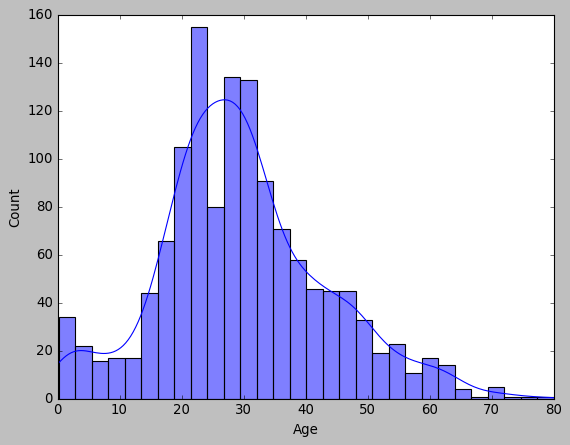

In [124]:
sns.histplot(data=titanic, x='Age', kde=True)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

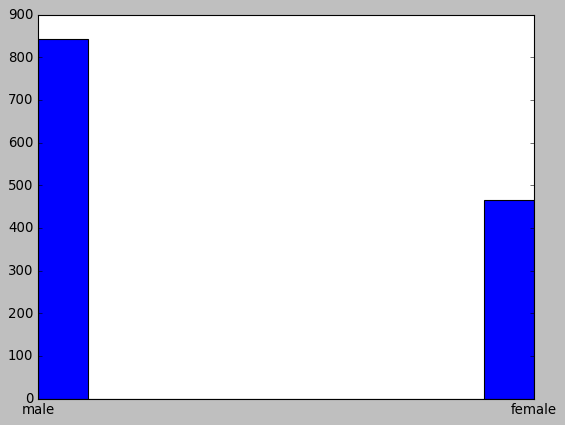

In [126]:
# Method 1 - matplotlib
# your code here

plt.hist(titanic.Gender)
plt.show()

<Axes: xlabel='Gender', ylabel='Count'>

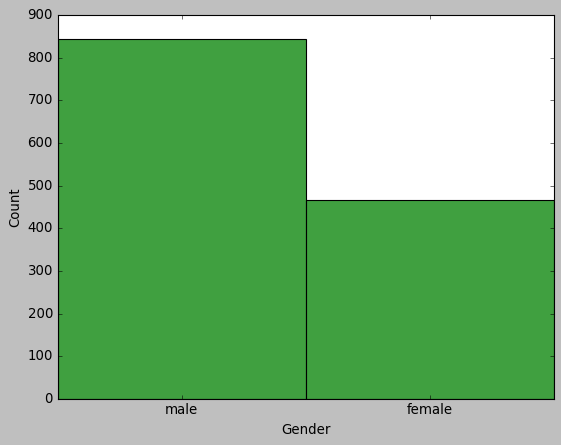

In [128]:
# Method 2 - seaborn
# your code here

sns.histplot(data=titanic['Gender'], color='green')


#### Use the right plot to visualize the column `Pclass`.

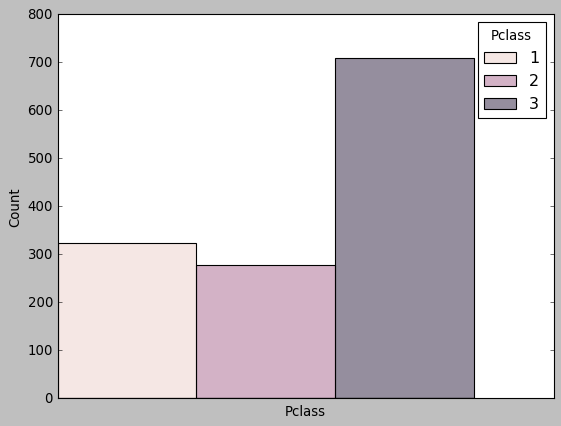

In [142]:
# your code here

sns.histplot(data=titanic, x='Pclass', hue='Pclass', binwidth=0.7)
plt.xticks([]) 
plt.show()


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

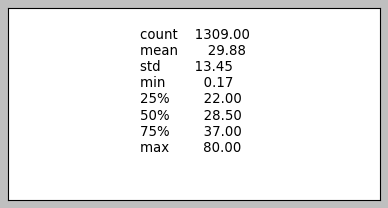

In [154]:
# your code here

fig, ax = plt.subplots(figsize=(6,3))
plt.figtext(0.4,0.3, titanic.Age.describe().round(2).to_string())
plt.xticks([])
plt.yticks([])

plt.show()

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
The average age of titanic was 30 years old
the youngest was a baby with 0.17 years

75% of the passangers were bellow the age 37
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

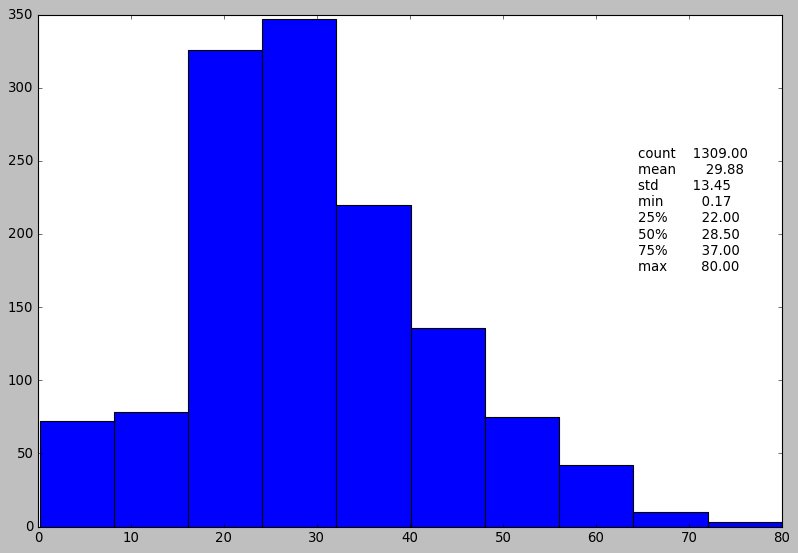

In [159]:
fig, ax = plt.subplots(figsize=(12,8))
plt.figtext(0.75,0.5, titanic.Age.describe().round(2).to_string())
plt.hist(titanic['Age'], bins = 10)


plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
We can now see the concentration of ages and how may people were actually inside an age bin. Allowing us also to see the distribution by bins of 10 years
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

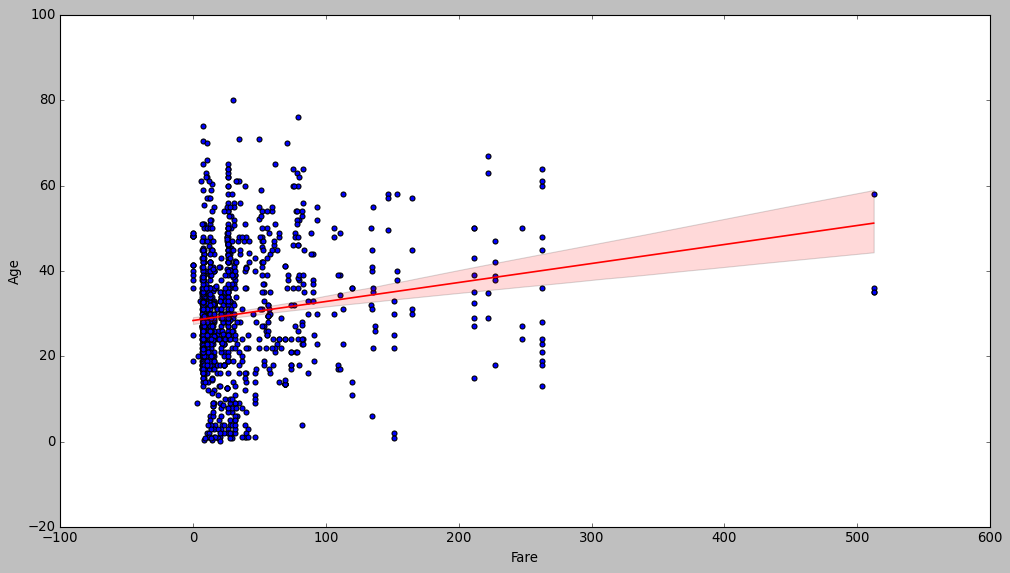

In [165]:
# Method 1 - matplotlib
# your code here

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(titanic.Fare, titanic.Age)
sns.regplot(x='Fare', y='Age', data=titanic, scatter=False, color='red', ax=ax)
plt.show()

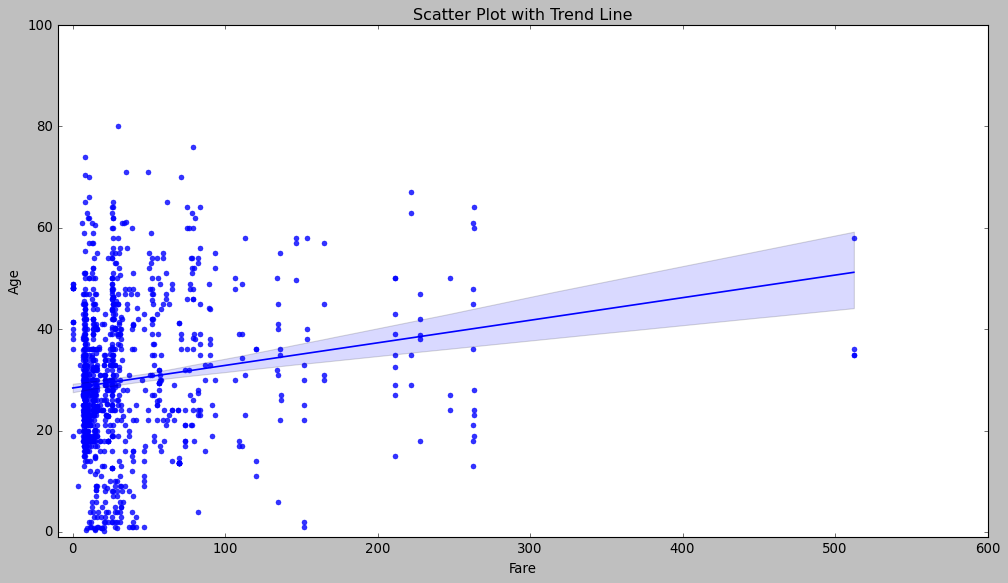

In [174]:
# Method 2 - seaborn
# your code here

fig, ax = plt.subplots(figsize=(15, 8))

sns.regplot(x='Fare', y='Age', data=titanic, scatter=True, color='blue')
plt.xlim(-10)
plt.ylim(-1)

plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Scatter Plot with Trend Line')
plt.show()

#### Plot the correlation matrix using seaborn.

C:\Users\nunoc\AppData\Local\Temp\ipykernel_21176\2249949807.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.iloc[:,1:].corr(), annot=True, linewidth=1)


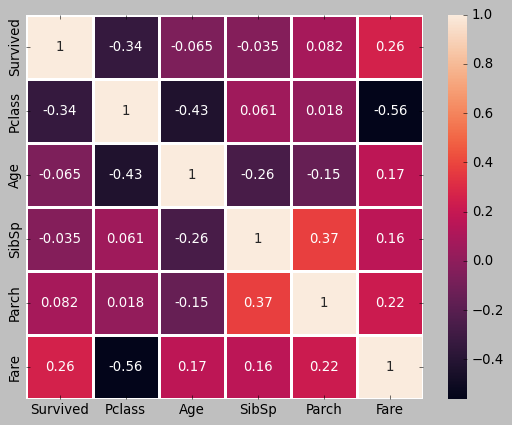

In [179]:
# your code here

sns.heatmap(titanic.iloc[:,1:].corr(), annot=True, linewidth=1)
plt.show()

#### What are the most correlated features?

In [ ]:
"""
Pclass and Fare
Pclass and Age
survived and pclass
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

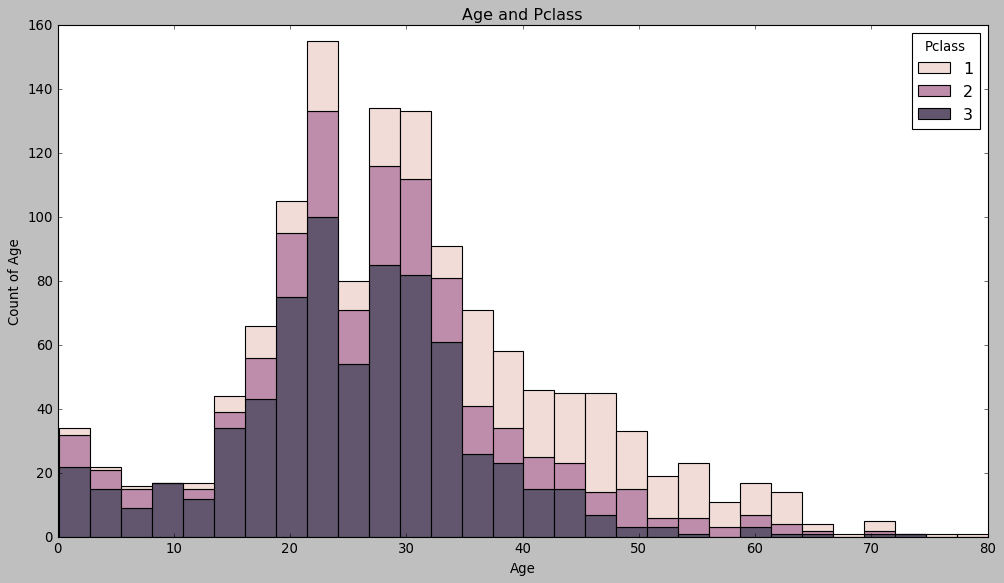

In [187]:

fig, ax = plt.subplots(figsize=(15, 8))

sns.histplot(data=titanic, x='Age', hue='Pclass', multiple='stack')


plt.xlabel('Age')
plt.ylabel('Count of Age')
plt.title('Age and Pclass')
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

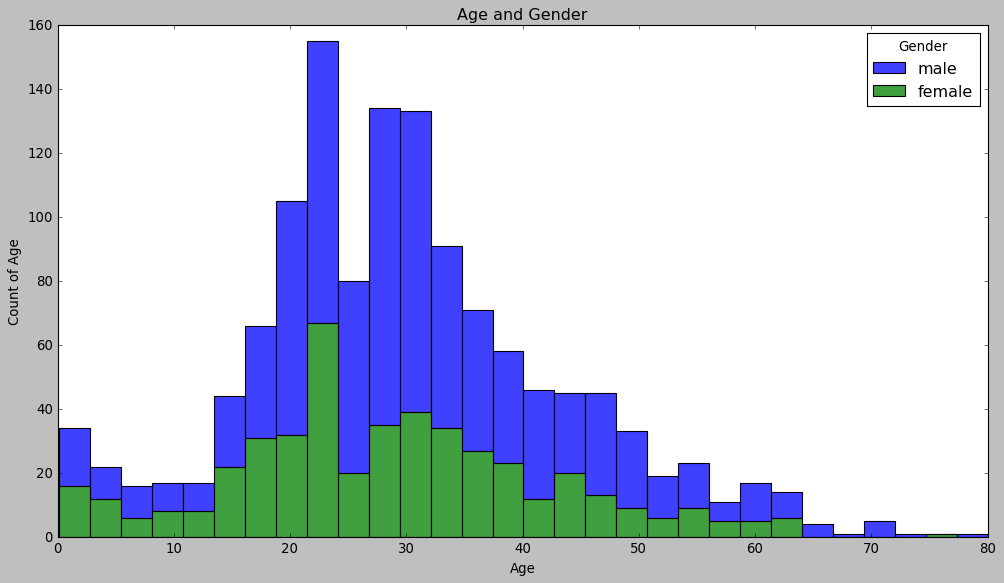

In [189]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.histplot(data=titanic, x='Age', hue='Gender', multiple='stack')


plt.xlabel('Age')
plt.ylabel('Count of Age')
plt.title('Age and Gender')
plt.show()